# Classification

## Completed by: Jayaditya (JD) Singh

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
ms_df = pd.read_csv("marketing_campaign.csv", sep='\t')
ms_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [42]:
ms_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [43]:
ms_df = ms_df.drop(columns= ['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Year_Birth'])
ms_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6
2238,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3


In [44]:
ms_df = pd.get_dummies(ms_df, columns= ['Education', 'Marital_Status'], drop_first=True)
ms_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,...,True,False,False,False,False,False,True,False,False,False
1,46344.0,1,1,38,11,1,6,2,1,6,...,True,False,False,False,False,False,True,False,False,False
2,71613.0,0,0,26,426,49,127,111,21,42,...,True,False,False,False,False,False,False,True,False,False
3,26646.0,1,0,26,11,4,20,10,3,5,...,True,False,False,False,False,False,False,True,False,False
4,58293.0,1,0,94,173,43,118,46,27,15,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,True,False,False,False,False,True,False,False,False,False
2236,64014.0,2,1,56,406,0,30,0,0,8,...,False,False,True,False,False,False,False,True,False,False
2237,56981.0,0,0,91,908,48,217,32,12,24,...,True,False,False,False,True,False,False,False,False,False
2238,69245.0,0,1,8,428,30,214,80,30,61,...,False,True,False,False,False,False,False,True,False,False


In [45]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
ms_df['Total_Spending'] = ms_df[spending_cols].sum(axis=1)
threshold = ms_df['Total_Spending'].quantile(0.75)
ms_df['Is_High_Spender'] = (ms_df['Total_Spending'] >= threshold).astype('boolean')

ms_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Total_Spending,Is_High_Spender
0,58138.0,0,0,58,635,88,546,172,88,88,...,False,False,False,False,True,False,False,False,1617,True
1,46344.0,1,1,38,11,1,6,2,1,6,...,False,False,False,False,True,False,False,False,27,False
2,71613.0,0,0,26,426,49,127,111,21,42,...,False,False,False,False,False,True,False,False,776,False
3,26646.0,1,0,26,11,4,20,10,3,5,...,False,False,False,False,False,True,False,False,53,False
4,58293.0,1,0,94,173,43,118,46,27,15,...,True,False,False,True,False,False,False,False,422,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,False,False,False,True,False,False,False,False,1341,True
2236,64014.0,2,1,56,406,0,30,0,0,8,...,True,False,False,False,False,True,False,False,444,False
2237,56981.0,0,0,91,908,48,217,32,12,24,...,False,False,True,False,False,False,False,False,1241,True
2238,69245.0,0,1,8,428,30,214,80,30,61,...,False,False,False,False,False,True,False,False,843,False


In [46]:
feature_cols = ms_df.columns.drop(['Total_Spending', 'Is_High_Spender'])
X = ms_df[feature_cols]
y = ms_df['Is_High_Spender'].astype(int)

In [47]:
X = X.fillna(X.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("=== Classification Metrics ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


=== Classification Metrics ===
Accuracy : 0.9732142857142857
Precision: 0.9516129032258065
Recall   : 0.9516129032258065
F1 Score : 0.9516129032258065

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       324
           1       0.95      0.95      0.95       124

    accuracy                           0.97       448
   macro avg       0.97      0.97      0.97       448
weighted avg       0.97      0.97      0.97       448



C:\Users\jayad\AppData\Local\Temp\ipykernel_4120\4162491254.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


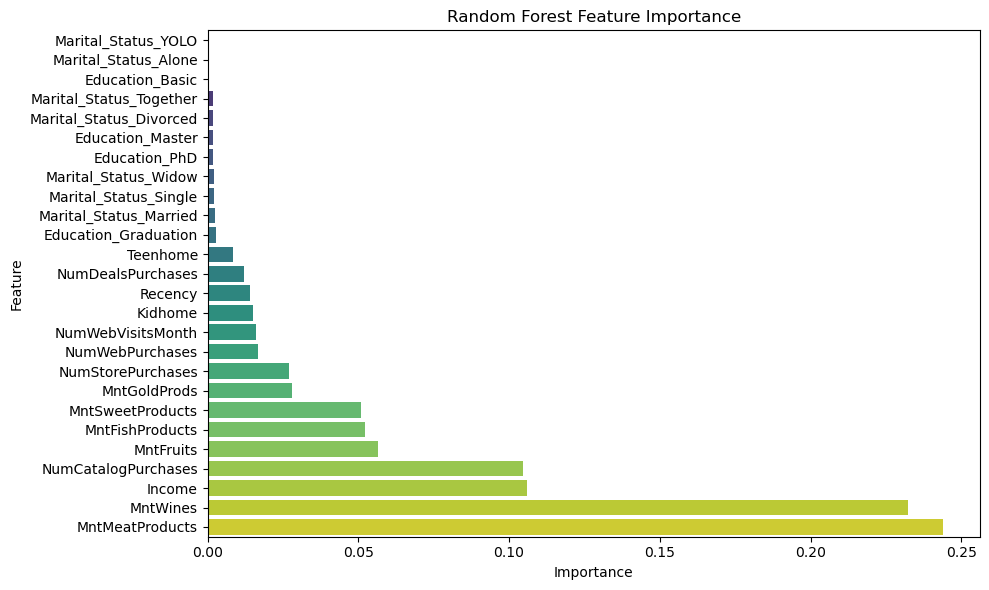

In [48]:
importances = clf.feature_importances_
feature_names = feature_cols

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()
